<a href="https://colab.research.google.com/github/BMClab/BasesComputacionais/blob/master/tmp/visu_data_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de dados em Python/jupyter

Há um grande número de bibliotecas para visualização de dados em Python, veja por exemplo esse mapa de bibliotecas disponíveis:  

<figure><center><img src="https://optimise2.assets-servd.host/voracious-blesbok/production/Blog/PythonVisLandscape.jpg?w=1200&auto=compress%2Cformat&fit=crop&dm=1632326979&s=35cf543e04fd14bcc881ef8e70363860" width=700 /><figcaption><center><i>Figura da palestra de <a href="https://youtu.be/FytuB8nFHPQ">Jake VanderPlas "The Python Visualization Landscape PyCon 2017"</a> e do artigo <a href="https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries">"Python Data Visualization 2018: Why So Many Libraries?"</a>.</i></figcaption></center></figure> 



## Visualização de dados armazenados em Pandas DataFrame

Quando os dados a serem visualizados estão armazenados em Pandas DataFrame, a própria bilioteca oferece métodos para plotar os dados, por exemplo:

In [ ]:
import pandas as pd
#  porcentagem da população brasileira que é analfabeta, dividida por unidade da federação, de 1981 a 2014:
analfa = pd.read_csv('https://raw.githubusercontent.com/BMClab/BasesComputacionais/master/dados/analfabetismo.csv', index_col=0)
analfa.head()

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
Ano,,,,,,,,,,,,,,,,,,,,,
1981,24.771344,48.714720,13.740147,16.864253,36.535406,42.453047,11.212273,22.497828,24.408604,45.911225,...,20.287721,11.707655,41.634136,20.128014,9.138271,12.830248,12.911638,39.670939,12.523352,NaN
1982,20.682421,53.185056,16.232134,12.843550,36.971875,44.385931,9.902721,25.009842,24.515374,47.265996,...,20.868585,11.605974,39.494989,19.557072,13.383961,13.032632,13.646692,45.435048,12.740826,NaN
1983,20.823673,51.491081,10.814711,13.890302,35.278137,42.979866,10.611223,21.918142,22.788413,47.242423,...,19.946446,10.601789,42.384636,14.922802,5.685683,12.622268,10.795336,40.218682,11.785755,NaN
1984,20.964519,51.779179,11.525739,13.939237,34.639949,43.037199,10.191576,21.635366,21.619731,43.843360,...,18.255011,10.742911,39.565673,13.264554,9.146159,12.520865,11.352639,40.969008,11.688915,NaN
1985,22.012728,50.541485,10.735491,12.779264,35.909958,40.910827,10.939660,20.918003,20.665916,43.916950,...,17.346611,10.110057,40.155873,13.389101,7.023061,11.254618,10.950922,39.226516,10.876103,NaN


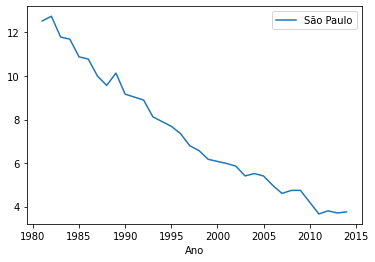

In [ ]:
analfa.plot(y='São Paulo');  # uma única linha...

Ou se quisermos customizar o plot:

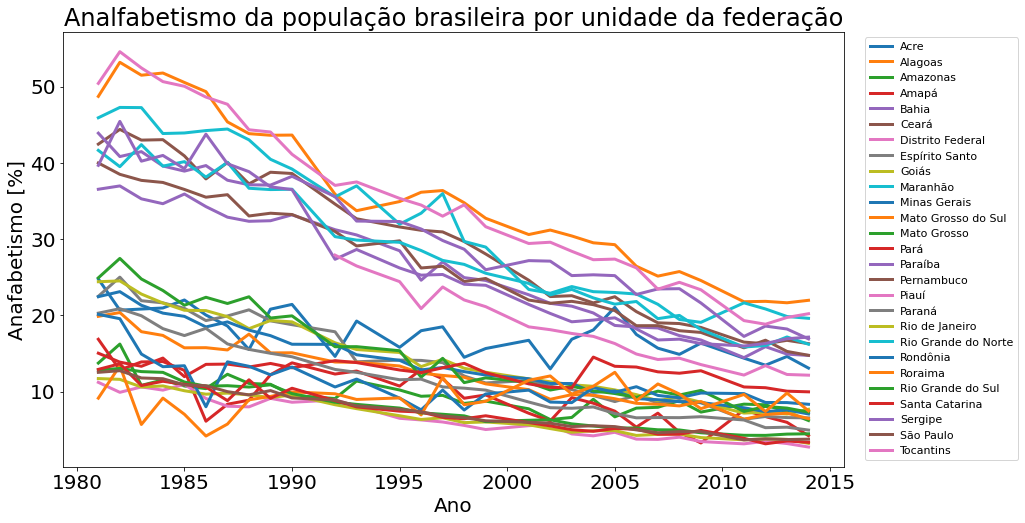

In [ ]:
axs = analfa.plot(ylabel='Anafabetismo [%]', figsize=(14, 8))
axs.set_title('Analfabetismo da população brasileira por unidade da federação');
axs.legend(fontsize=11, bbox_to_anchor=(1.02, 1.0), loc='upper left');

## Usando a biblioteca [plotly](https://plotly.com/)

Exemplos: [Plotly Open Source Graphing Library for Python](https://plotly.com/python/)

"The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.  
Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures."

In [ ]:
# Upgrade Plotly library since Google Colab environment may have an older version of Plotly
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 12.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [8]:
import plotly.express as px

In [9]:
# Use the built-in sample dataset gapminder
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [10]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                size="pop", color="continent", hover_name="country",
                log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90],
                title="Health versus wealth over the years", width=1200, height=600)

fig.show()